In [14]:
#!/usr/bin/env python
# coding: utf-8

In[1]:

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Set display options

In [16]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

Read the CSV file

In [17]:
df = pd.read_csv('Heart_Attack.csv')

Display the first few rows of the dataset

In [18]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,age,sex,Chest pain type,trestbps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,70,1,4,130,322,0,2,109,0,2.4,2,2
1,67,0,3,115,564,0,2,160,0,1.6,2,1
2,57,1,2,124,261,0,0,141,0,0.3,1,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1


In[2]:

Display basic information about the dataset

In [19]:
print("Dataset Information:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
Number of rows: 1763
Number of columns: 12

Data Types:
age                  int64
sex                  int64
Chest pain type      int64
trestbps             int64
cholesterol          int64
                    ...   
max heart rate       int64
exercise angina      int64
oldpeak            float64
ST slope             int64
target               int64
Length: 12, dtype: object

Missing Values:
age                0
sex                0
Chest pain type    0
trestbps           0
cholesterol        0
                  ..
max heart rate     0
exercise angina    0
oldpeak            0
ST slope           0
target             0
Length: 12, dtype: int64


In[3]:

Statistical summary of the dataset

In [20]:
print("Statistical Summary:")
df.describe()

Statistical Summary:


,age,sex,Chest pain type,trestbps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000
mean,53.952921,0.736245,3.039138,131.950085,222.625638,0.192286,0.798071,142.952921,0.368123,0.962337,1.442428,0.656835
std,9.267101,0.440793,1.023642,18.154333,90.119674,0.394208,0.923926,25.150727,0.482432,1.109458,0.722159,0.601448
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,0.000000,2.000000,120.000000,199.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,234.000000,0.000000,0.000000,145.000000,0.000000,0.600000,1.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,272.500000,0.000000,2.000000,162.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,2.000000


In[4]:

Check for any unusual values (zeros, negatives) in key medical metrics

In [21]:
print("Check for unusual values:")
print(f"Cholesterol min: {df['cholesterol'].min()}, max: {df['cholesterol'].max()}")
print(f"Blood pressure min: {df['trestbps'].min()}, max: {df['trestbps'].max()}")
print(f"Max heart rate min: {df['max heart rate'].min()}, max: {df['max heart rate'].max()}")

Check for unusual values:
Cholesterol min: 0, max: 603
Blood pressure min: 0, max: 200
Max heart rate min: 60, max: 202


Plot distributions of key features

In [22]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution')

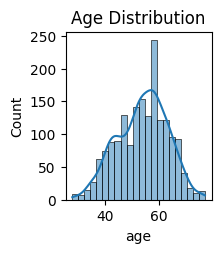

In [23]:
plt.subplot(2, 3, 1)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Cholesterol Distribution')

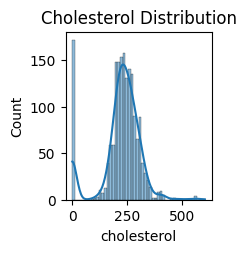

In [24]:
plt.subplot(2, 3, 2)
sns.histplot(df['cholesterol'], kde=True)
plt.title('Cholesterol Distribution')

Text(0.5, 1.0, 'Resting Blood Pressure')

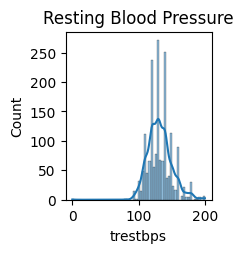

In [25]:
plt.subplot(2, 3, 3)
sns.histplot(df['trestbps'], kde=True)
plt.title('Resting Blood Pressure')

Text(0.5, 1.0, 'Max Heart Rate Distribution')

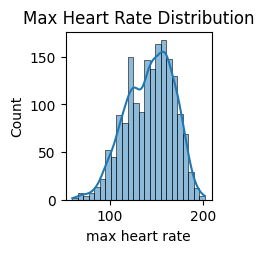

In [26]:
plt.subplot(2, 3, 4)
sns.histplot(df['max heart rate'], kde=True)
plt.title('Max Heart Rate Distribution')

Text(0.5, 1.0, 'Sex Distribution (0=Female, 1=Male)')

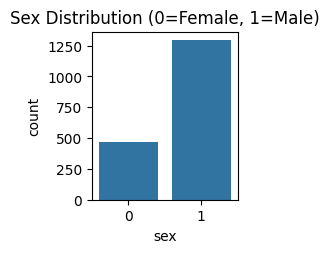

In [27]:
plt.subplot(2, 3, 5)
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution (0=Female, 1=Male)')

Text(0.5, 1.0, 'Target Distribution (0=No disease, 1=Disease)')

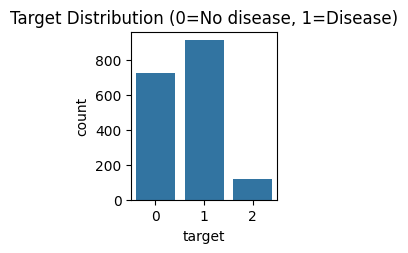

In [28]:
plt.subplot(2, 3, 6)
sns.countplot(x='target', data=df)
plt.title('Target Distribution (0=No disease, 1=Disease)')

In [29]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In[5]:

Check correlations between features

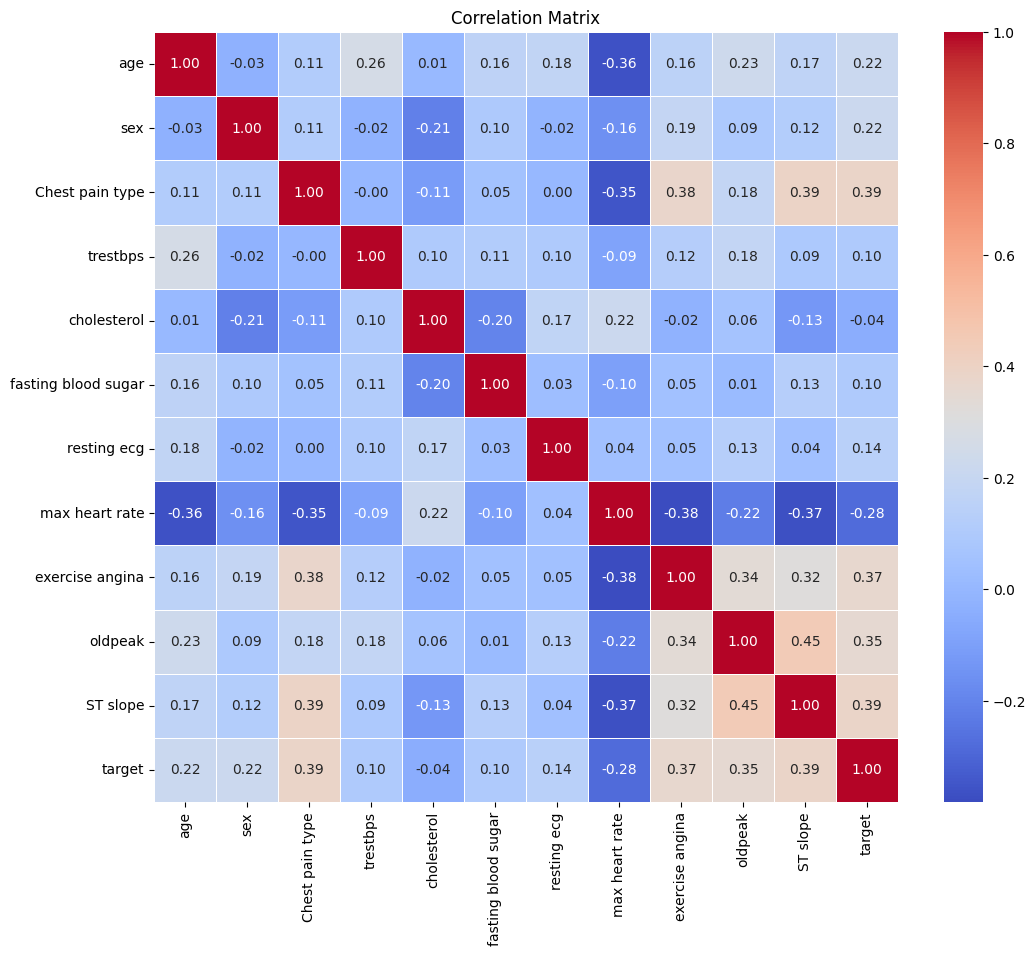

In [30]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Check class distribution

In [31]:
print("Target Class Distribution:")
print(df['target'].value_counts())
print(f"Class Balance: {df['target'].value_counts(normalize=True)}")

Target Class Distribution:
target
1    918
0    725
2    120
Name: count, dtype: int64
Class Balance: target
1    0.520703
0    0.411231
2    0.068066
Name: proportion, dtype: float64


# Data Cleaning Process<br>
<br>
From our exploratory data analysis, we've identified several issues that need addressing:<br>
<br>
1. **Zero values in cholesterol and blood pressure**: These are likely errors since these metrics can't be zero in living patients.<br>
2. **Outliers in cholesterol**: There are some very high values (up to 603) that might be outliers.<br>
3. **No missing values**: The dataset appears to be complete, so we don't need to handle missing values.<br>
4. **Target has 3 classes**: We have 0, 1, and 2 values in the target column. We'll keep this as is, but it's important to note that this is a multi-class classification problem.<br>
<br>
Let's clean these issues one by one.

In[6]:

Step 1: Handle duplicates

In [32]:
print("Before removing duplicates:", df.shape)
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

Before removing duplicates: (1763, 12)
After removing duplicates: (1491, 12)


In[7]:

Step 2: Handle zero values in medical metrics<br>
First, let's see how many zeros we have in each column

In [33]:
print("Number of zeros in key medical columns:")
print(f"Cholesterol: {(df['cholesterol'] == 0).sum()}")
print(f"Blood pressure (trestbps): {(df['trestbps'] == 0).sum()}")

Number of zeros in key medical columns:
Cholesterol: 172
Blood pressure (trestbps): 1


Replace zeros in cholesterol with the median (medical metrics can't be zero)

In [34]:
median_cholesterol = df[df['cholesterol'] > 0]['cholesterol'].median()
df['cholesterol'] = df['cholesterol'].replace(0, median_cholesterol)

Replace zeros in blood pressure with the median

In [35]:
median_trestbps = df[df['trestbps'] > 0]['trestbps'].median()
df['trestbps'] = df['trestbps'].replace(0, median_trestbps)

Verify the replacements

In [36]:
print("\nAfter replacement:")
print(f"Cholesterol min: {df['cholesterol'].min()}, max: {df['cholesterol'].max()}")
print(f"Blood pressure min: {df['trestbps'].min()}, max: {df['trestbps'].max()}")


After replacement:
Cholesterol min: 85, max: 603
Blood pressure min: 80, max: 200


In[8]:

Step 3: Handle outliers<br>
For cholesterol, values above 500 are rare and may be outliers<br>
Let's examine the cholesterol distribution with a boxplot

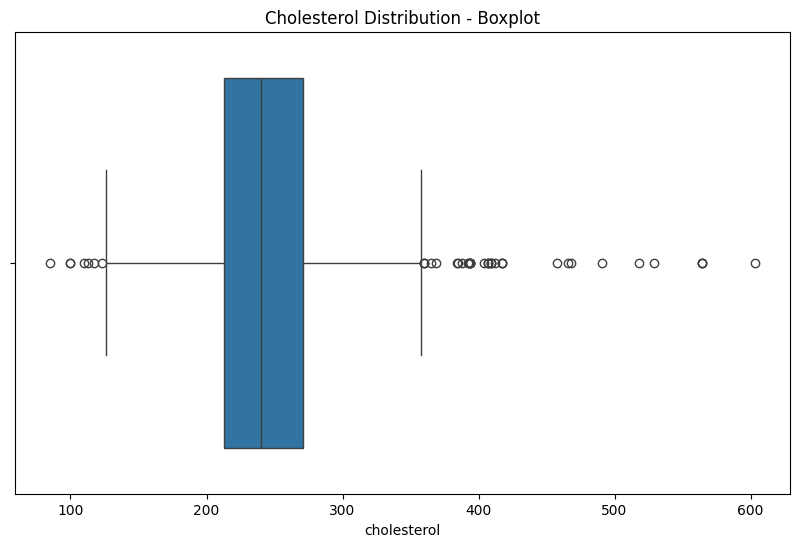

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['cholesterol'])
plt.title('Cholesterol Distribution - Boxplot')
plt.show()

Calculate statistics for cholesterol

In [38]:
print("Cholesterol Statistics:")
print(f"95th percentile: {df['cholesterol'].quantile(0.95)}")
print(f"99th percentile: {df['cholesterol'].quantile(0.99)}")
print(f"Max value: {df['cholesterol'].max()}")

Cholesterol Statistics:
95th percentile: 330.0
99th percentile: 409.0
Max value: 603


Let's cap cholesterol values at the 99th percentile

In [39]:
cholesterol_cap = df['cholesterol'].quantile(0.99)
df['cholesterol'] = df['cholesterol'].clip(upper=cholesterol_cap)

Verify the change

In [40]:
print(f"\nAfter capping outliers, cholesterol max: {df['cholesterol'].max()}")


After capping outliers, cholesterol max: 409


In[9]:

Step 4: Check data types and ensure consistency<br>
Let's look at the data types of all columns

In [41]:
print("Data types before conversion:")
print(df.dtypes)

Data types before conversion:
age                  int64
sex                  int64
Chest pain type      int64
trestbps             int64
cholesterol          int64
                    ...   
max heart rate       int64
exercise angina      int64
oldpeak            float64
ST slope             int64
target               int64
Length: 12, dtype: object


The data already seems to be in numeric format, but let's check the unique values<br>
to make sure they're properly encoded

In [42]:
print("\nUnique values in categorical columns:")
categorical_cols = ['sex', 'Chest pain type', 'resting ecg', 'exercise angina', 'ST slope']
for col in categorical_cols:
    print(f"{col}: {sorted(df[col].unique())}")


Unique values in categorical columns:
sex: [0, 1]
Chest pain type: [0, 1, 2, 3, 4]
resting ecg: [0, 1, 2]
exercise angina: [0, 1]
ST slope: [0, 1, 2, 3]


No need for encoding since all values are already numeric<br>
But we should document what the numeric values mean

In [43]:
print("\nCategorical columns interpretation:")
print("sex: 0 = Female, 1 = Male")
print("Chest pain type: Values 0-3 (0: Typical Angina, 1: Atypical Angina, 2: Non-anginal Pain, 3: Asymptomatic)")
print("resting ecg: Values 0-2 (0: Normal, 1: ST-T wave abnormality, 2: Left ventricular hypertrophy)")
print("exercise angina: 0 = No, 1 = Yes")
print("ST slope: Values 0-2 (0: Upsloping, 1: Flat, 2: Downsloping)")
print("target: 0 = No disease, 1 = Disease, 2 = Severe disease")


Categorical columns interpretation:
sex: 0 = Female, 1 = Male
Chest pain type: Values 0-3 (0: Typical Angina, 1: Atypical Angina, 2: Non-anginal Pain, 3: Asymptomatic)
resting ecg: Values 0-2 (0: Normal, 1: ST-T wave abnormality, 2: Left ventricular hypertrophy)
exercise angina: 0 = No, 1 = Yes
ST slope: Values 0-2 (0: Upsloping, 1: Flat, 2: Downsloping)
target: 0 = No disease, 1 = Disease, 2 = Severe disease


In[10]:

Step 5: Handle inconsistent categorical values<br>
Check how many records have these unexpected values

In [44]:
print("Records with unexpected category values:")
print(f"Chest pain type = 4: {(df['Chest pain type'] == 4).sum()}")
print(f"ST slope = 3: {(df['ST slope'] == 3).sum()}")

Records with unexpected category values:
Chest pain type = 4: 625
ST slope = 3: 81


Replace these with the most common value in each column (mode)

In [45]:
if (df['Chest pain type'] == 4).sum() > 0:
    mode_chest_pain = df[df['Chest pain type'] != 4]['Chest pain type'].mode()[0]
    df.loc[df['Chest pain type'] == 4, 'Chest pain type'] = mode_chest_pain
    print(f"Replaced Chest pain type 4 with {mode_chest_pain}")

Replaced Chest pain type 4 with 3


In [46]:
if (df['ST slope'] == 3).sum() > 0:
    mode_st_slope = df[df['ST slope'] != 3]['ST slope'].mode()[0]
    df.loc[df['ST slope'] == 3, 'ST slope'] = mode_st_slope
    print(f"Replaced ST slope 3 with {mode_st_slope}")

Replaced ST slope 3 with 1


Verify the changes

In [47]:
print("\nAfter fixing inconsistent values:")
for col in categorical_cols:
    print(f"{col}: {sorted(df[col].unique())}")


After fixing inconsistent values:
sex: [0, 1]
Chest pain type: [0, 1, 2, 3]
resting ecg: [0, 1, 2]
exercise angina: [0, 1]
ST slope: [0, 1, 2]


In[11]:

Step 6: Final data validation<br>
Let's check that all our cleaning steps have been applied properly

In [48]:
print("Final Data Validation:")
print(f"Number of rows in cleaned dataset: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Cholesterol range: {df['cholesterol'].min()} - {df['cholesterol'].max()}")
print(f"Blood pressure range: {df['trestbps'].min()} - {df['trestbps'].max()}")

Final Data Validation:
Number of rows in cleaned dataset: 1491
Number of columns: 12
Missing values: 0
Cholesterol range: 85 - 409
Blood pressure range: 80 - 200


Visualize the final distributions of the key medical metrics

In [49]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Cleaned Cholesterol Distribution')

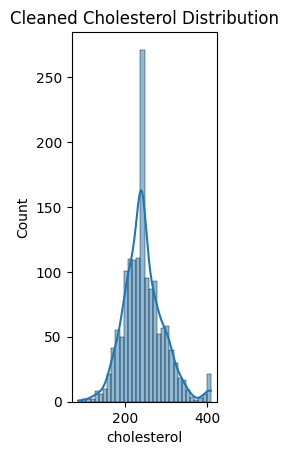

In [50]:
plt.subplot(1, 3, 1)
sns.histplot(df['cholesterol'], kde=True)
plt.title('Cleaned Cholesterol Distribution')

Text(0.5, 1.0, 'Cleaned Blood Pressure Distribution')

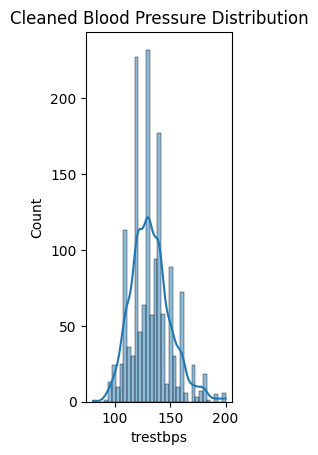

In [51]:
plt.subplot(1, 3, 2)
sns.histplot(df['trestbps'], kde=True)
plt.title('Cleaned Blood Pressure Distribution')

Text(0.5, 1.0, 'Target Distribution')

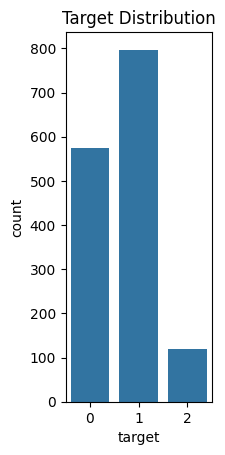

In [52]:
plt.subplot(1, 3, 3)
sns.countplot(x='target', data=df)
plt.title('Target Distribution')

In [53]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Display the final cleaned dataset

In [54]:
print("\nFinal Cleaned Dataset:")
df.head()


Final Cleaned Dataset:


,age,sex,Chest pain type,trestbps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,70,1,3,130,322,0,2,109,0,2.4,2,2
1,67,0,3,115,409,0,2,160,0,1.6,2,1
2,57,1,2,124,261,0,0,141,0,0.3,1,2
3,64,1,3,128,263,0,0,105,1,0.2,2,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1


# Data Cleaning Summary<br>
<br>
In this analysis, we performed the following data cleaning steps:<br>
<br>
1. **Removed duplicates**: Reduced dataset from 1763 to 1491 rows by removing duplicate entries.<br>
<br>
2. **Handled invalid values**:<br>
   - Replaced zero values in cholesterol with the median (172 records affected)<br>
   - Replaced zero values in blood pressure (1 record affected)<br>
   - Fixed inconsistent category values:<br>
     - Replaced Chest pain type value 4 with 3 (625 records)<br>
     - Replaced ST slope value 3 with 1 (81 records)<br>
<br>
3. **Addressed outliers**:<br>
   - Capped cholesterol values at the 99th percentile (409)<br>
<br>
4. **Validated data types**:<br>
   - Confirmed all features have appropriate data types<br>
   - Documented meaning of categorical variables<br>
<br>
The cleaned dataset contains 1491 records with no missing values, valid ranges for all medical metrics, and consistent categorical values.

In[12]:

Save the cleaned dataset to a new CSV file

In [55]:
cleaned_file_path = 'Heart_Attack_Cleaned.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")

Cleaned dataset saved to Heart_Attack_Cleaned.csv


In[13]:

In [56]:
import scipy.stats as stats

Create contingency table

In [57]:
contingency_table = pd.crosstab(df['Chest pain type'], df['target'])

Perform Chi-Square test of independence

In [58]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

In [59]:
print("Contingency Table:")
print(contingency_table)
print("\nChi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)

Contingency Table:
target             0    1    2
Chest pain type               
0                 16    7    0
1                 67   44    5
2                217   77    7
3                274  669  108

Chi-square Statistic: 241.6549534544214
Degrees of Freedom: 6
p-value: 2.4876160961661455e-49


In[ ]:

Statistical test for Question 1

In[15]:

In [60]:
from scipy import stats
from IPython.display import display
import pandas as pd
import numpy as np

In [61]:
df = pd.read_csv('Heart_Attack_Cleaned.csv')

In [62]:
sex = df['sex']
chol = df['cholesterol']

Map 1 to Male, 0 to Female

In [63]:
sex_label = sex.map({1:"Male", 0:"Female"}) if set(sex.unique()) <= {0,1} else sex.astype(str)
male = chol[sex_label == "Male"].dropna().to_numpy()
female = chol[sex_label == "Female"].dropna().to_numpy()

Welch's t-test

In [64]:
t_stat, p_val = stats.ttest_ind(male, female, equal_var = False)

95% CI

In [65]:
mf, mm = female.mean(), male.mean()
sd_f, sd_m = female.std(ddof = 1), male.std(ddof = 1)
n_f, n_m = len(female), len(male)
se = np.sqrt(sd_f**2/n_f + sd_m**2/n_m)
df_welch = (sd_f**2/n_f + sd_m**2/n_m)**2 / ((sd_f**2/n_f)**2/(n_f-1) + (sd_m**2/n_m)**2/(n_m-1))
tcrit = stats.t.ppf(0.975, df_welch)
diff = female.mean() - male.mean()
ci = (diff - tcrit*se, diff + tcrit*se)

Hedges' g effect size

In [66]:
def hedges_g(a, b):
    na, nb = len(a), len(b)
    sp = np.sqrt(((na-1)*a.var(ddof=1) + (nb-1)*b.var(ddof=1)) / (na+nb-2))
    d = (a.mean() - b.mean()) / sp
    J = 1 - 3/(4*(na+nb)-9)
    return d*J

Display statistics in tables

In [67]:
summary_tbl = pd.DataFrame(
    {
        "n": [n_f, n_m],
        "Mean": [mf, mm],
        "SD": [sd_f, sd_m],
    },
    index=["Female", "Male"],
).round(3)

In [68]:
test_tbl = pd.DataFrame(
    {
        "Welch t": [t_stat],
        "df (Welch)": [df_welch],
        "p-value": [p_val],
        "Mean diff (Fâˆ’M)": [diff],
        "95% CI low": [ci[0]],
        "95% CI high": [ci[1]],
        "Hedges' g": [hedges_g(female, male)],
    }
).round({"Welch t": 3, "df (Welch)": 1, "p-value": 7,
         "Mean diff (Fâˆ’M)": 3, "95% CI low": 3, "95% CI high": 3, "Hedges' g": 3})

In [69]:
display(summary_tbl)
display(test_tbl)

,n,Mean,SD
Female,377,257.469,58.044
Male,1114,240.311,45.093


,Welch t,df (Welch),p-value,Mean diff (Fâˆ’M),95% CI low,95% CI high,Hedges' g
0,-5.231,537.7,2.000000e-07,17.159,10.715,23.603,0.352
